In [1]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
from pandas.tools.plotting import autocorrelation_plot
from scipy.stats import ks_2samp

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
pipeline = pd.read_csv('C:/Python27/output_improved_AMS.csv')[['Listing ID','Sentiment score']]
airbnb= pd.read_csv('C:/Python27/AirbnbRating.csv')[['Id','Overall']]

In [3]:
# Get the overall ratings for each listing from the pipeline and save them in a new csv file

set1=pipeline.groupby('Listing ID').mean().round(2)
set1.to_csv(path_or_buf='C:/Python27/Pipelineclean1.csv')

In [4]:
# Delete all the rows with a NaN value and save in a new csv. Both the csv will be joined using the command line
# and based on Listing ID

set2 = airbnb.dropna()
set2.to_csv(path_or_buf='C:/Python27/Airbnbclean.csv')

In [29]:
# Read the csv of the merged file

comparison=pd.read_csv('C:/Python27/merged_AMS.csv')
comparison[:3]

,Overall,Listing ID,Sentimentscore
0,5.0,1000126,4.0
1,5.0,1000252,4.0
2,5.0,1000866,4.5


## Comparison of Airbnb star rating and pipeline

In [30]:
# For filling the dataframe
i=5.0
s0=comparison[comparison['Overall']==i]
s00=s0['Sentimentscore'].value_counts()
b=pd.DataFrame({'Airbnb':i, 'Pipeline':s00.index, 'V_Frequency': s00.values})
i=4.5
s1=comparison[comparison['Overall']==i]
s11=s1['Sentimentscore'].value_counts()
b1=pd.DataFrame({'Airbnb':i, 'Pipeline':s11.index, 'V_Frequency': s11.values},index=[3,4,5,6])
i=4.0,
s2=comparison[comparison['Overall']==i]
s22=s2['Sentimentscore'].value_counts()
b2=pd.DataFrame({'Airbnb':i, 'Pipeline':s22.index, 'V_Frequency': s22.values}, index=[7,8,9])
i=3.5
s3=comparison[comparison['Overall']==i]
s33=s3['Sentimentscore'].value_counts()
b3=pd.DataFrame({'Airbnb':i, 'Pipeline':s33.index, 'V_Frequency': s33.values},index=[10,11])
i=3.0
s4=comparison[comparison['Overall']==i]
s44=s4['Sentimentscore'].value_counts()
b4=pd.DataFrame({'Airbnb':i, 'Pipeline':s44.index, 'V_Frequency': s44.values},index=[12])
stars_compared=pd.concat([b,b1,b2,b3,b4])
stars_compared['Percentage']=((stars_compared['V_Frequency']/stars_compared['V_Frequency'].sum())*100).round(2)
stars_compared.columns=['Airbnb','Pipeline','Frequency','Percentage']
stars_compared

,Airbnb,Pipeline,Frequency,Percentage
0,5.0,4.0,650,31.36
1,5.0,4.5,404,19.49
2,5.0,3.5,2,0.10
3,4.5,4.0,686,33.09
4,4.5,4.5,199,9.60
5,4.5,3.5,4,0.19
6,4.5,3.0,1,0.05
7,4.0,4.0,100,4.82
8,4.0,4.5,11,0.53
9,4.0,3.5,7,0.34


## Visualization of most frequent star values and grouping non-frequent as "others"

In [31]:
ot=stars_compared[stars_compared['Percentage']<0.55]
other=ot['Percentage'].sum()
other
freq=ot['Frequency'].sum()
main=stars_compared[stars_compared['Percentage']>=0.55]
main.loc[13]=['Other','Other',freq,other]
main

c:\python27\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Airbnb,Pipeline,Frequency,Percentage
0,5,4,650,31.36
1,5,4.5,404,19.49
3,4.5,4,686,33.09
4,4.5,4.5,199,9.60
7,4,4,100,4.82
13,Other,Other,34,1.65


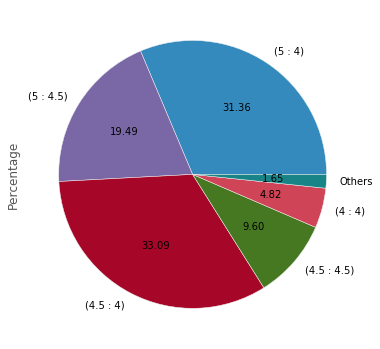

In [32]:
main['Percentage'].plot(kind='pie', labels=['(5 : 4)', '(5 : 4.5)', 
                                            '(4.5 : 4)', '(4.5 : 4.5)', '(4 : 4)', 'Others'],
                        autopct='%.2f', fontsize=10, figsize=(6, 6))

## The occurence of "rare" combinations

In [33]:
ot

,Airbnb,Pipeline,Frequency,Percentage
2,5.0,3.5,2,0.10
5,4.5,3.5,4,0.19
6,4.5,3.0,1,0.05
8,4.0,4.5,11,0.53
9,4.0,3.5,7,0.34
10,3.5,4.0,6,0.29
11,3.5,3.5,2,0.10
12,3.0,5.0,1,0.05


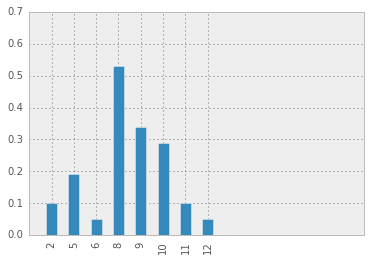

In [34]:
ot['Percentage'].plot(kind='bar',figsize=(6,4))
plt.axis([-1, 14, 0, 0.7])
plt.show()

## How value combination of stars is distributed

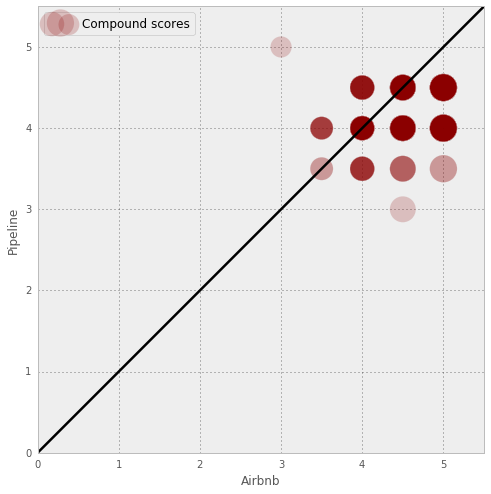

In [35]:
fx = comparison.plot(kind='scatter', x='Overall', y='Sentimentscore', color='DarkRed', 
                     label='Compound scores', s=comparison['Overall']*150, alpha=0.2, figsize=(8,8)).set_xlim(0,8)
line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.setp(line, color='Black', linewidth=2.5)
plt.xlabel('Airbnb')
plt.ylabel('Pipeline')
plt.show()

## The frequency for all Airbnb assigned stars

In [36]:
abnb=stars_compared[['Airbnb','Frequency','Percentage']].groupby('Airbnb').sum()
abnb

,Frequency,Percentage
Airbnb,,
3.0,1,0.05
3.5,8,0.39
4.0,118,5.69
4.5,890,42.93
5.0,1056,50.95


[0, 5.5, 0, 80]

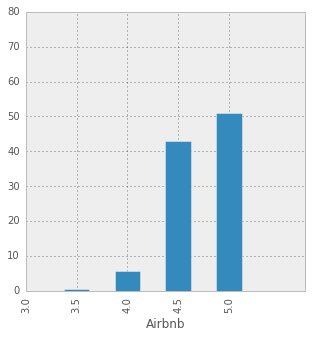

In [37]:
abnb['Percentage'].plot(kind='bar',figsize=(5,5))
plt.axis([0, 5.5, 0, 80])

## The frequency for the stars assigned by the pipeline

In [38]:
pip=stars_compared[['Pipeline','Frequency','Percentage']].groupby('Pipeline').sum()
pip

,Frequency,Percentage
Pipeline,,
3.0,1,0.05
3.5,15,0.73
4.0,1442,69.56
4.5,614,29.62
5.0,1,0.05


[0, 5.5, 0, 80]

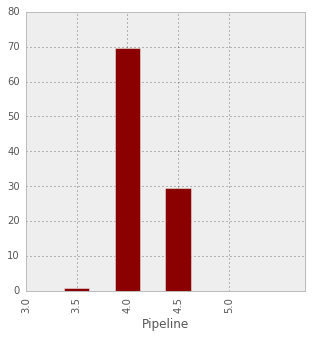

In [39]:
pip['Percentage'].plot(kind='bar',color='DarkRed',figsize=(5,5))
plt.axis([0, 5.5, 0, 80])

## The difference in stars Airbnb and pipeline compared

In [40]:
dfr=(comparison['Overall']-comparison['Sentimentscore']).value_counts()
norm= (comparison['Overall']-comparison['Sentimentscore']).value_counts(normalize=True)
dfrf=dfr.to_frame()
dfrf['Difference']=dfrf.index
dfrf['Normalized']=norm
dfrf.columns=['Frequency','Difference','Normalized']
dfrf[['Frequency','Normalized']]

,Frequency,Normalized
0.5,1097,0.529185
1.0,654,0.315485
0.0,301,0.145200
-0.5,17,0.008201
1.5,3,0.001447
-2.0,1,0.000482


## Get Listing ID for cases with big differences 

In [41]:
comparison['Difference'] = comparison['Overall']-comparison['Sentimentscore']
bg1=comparison[comparison['Difference']>1]
ls1=comparison[comparison['Difference']<-1]
weird=pd.concat([bg1,ls1])
weird_listing=weird['Listing ID']
weird

,Overall,Listing ID,Sentimentscore,Difference
491,5.0,1357971,3.5,1.5
564,4.5,1410370,3.0,1.5
1807,5.0,2606699,3.5,1.5
34,3.0,1022631,5.0,-2.0


## Let's check these cases
Starting from the one with the biggest difference. So only one review... Which has a good sentiment score and makes the whole rating  of pipeline base only on this review

In [42]:
full_content = pd.read_csv('C:/Python27/output_improved_AMS.csv')[['Listing ID','Review ID','Sentence','Sentiment score']]
full_content[full_content['Listing ID']==1022631]

,Listing ID,Review ID,Sentence,Sentiment score
6515,1022631,10747505,"Had a lovely break, very cosy home had most co...",0.771737


# And now the cases with difference 1.5
## Let's see this one
And this other place has no reviews except of one cancelled reservation, for which the pipeline is neutral (3 stars)

In [43]:
full_content[full_content['Listing ID']==1410370]


,Listing ID,Review ID,Sentence,Sentiment score
90721,1410370,30601951,The reservation was canceled 20 days before ar...,0.0
90722,1410370,30601951,This is an automated posting.,0.0


## And another ...

In [45]:
full_content[full_content['Listing ID']==1357971]

,Listing ID,Review ID,Sentence,Sentiment score
79596,1357971,7741708,"We had a great time in Josh's Camper, he is ve...",0.733937
79597,1357971,7741708,So I hope we see us again!!,0.582708
79598,1357971,7741708,Thanks for the good time in your Camper!,0.726276
79599,1357971,8548435,A dream came true.... perfect!,0.717725
79600,1357971,8548435,Its a great experience to be living in the cam...,0.624893
79601,1357971,8548435,Almost like forgotten times relived.,0.149440
79602,1357971,8548435,I highly recommend it!!!,0.567441
79603,1357971,8548435,just Perfect.,0.571885
79604,1357971,9053128,"We had a lovely stay in Joshua's camper van, w...",0.883160
79605,1357971,31327563,"Josh is a very flexible,friendly and nice pers...",0.737339


## And the last case


In [46]:
full_content[full_content['Listing ID']==2606699]

,Listing ID,Review ID,Sentence,Sentiment score
268229,2606699,17075400,Amazing home and perfect location.,0.817624
268230,2606699,17075400,Rob was very friendly and welcoming.,0.469009
268231,2606699,17075400,Highly recommend this apartment!,0.474020
268232,2606699,20933169,I stayed at Rob's house over the weekend with ...,0.807398
268233,2606699,20933169,The house is spacious and cosy.,0.000000
268234,2606699,20933169,It's in a quiet neighborhood but still close e...,0.000000
268235,2606699,20933169,"Rob was very nice and accommodating, and even ...",-0.129799
268236,2606699,20933169,I would gladly stay there again.,0.339950
268237,2606699,28894069,"the location was amazing, the flat is little o...",0.726946
268238,2606699,28894069,however there was one bedroom and 2 singles be...,0.000000


## Correlation between the two samples

In [47]:
c1=comparison[['Overall','Sentimentscore']].corr()
c1

,Overall,Sentimentscore
Overall,1.000000,0.213125
Sentimentscore,0.213125,1.000000


## Standard error of mean of two samples

In [48]:
difference=comparison['Overall']-comparison['Sentimentscore']
difference.sem()

0.0076694773172373614

## Kolmogorov–Smirnov (KS) two sample test

In [49]:
x=comparison['Overall']
y=comparison['Sentimentscore']
ks_2samp(x, y)

(0.6420646406174626, 0.0)

In [50]:
n=comparison.count()
n

Overall           2073
Listing ID        2073
Sentimentscore    2073
Difference        2073
dtype: int64

## Let's now remove half a star from Airbnb values
I don't understand why p-value is 0.0 ...

In [51]:
comparison['RE: Overall']=comparison['Overall']-0.5
comparison[['RE: Overall','Sentimentscore']].corr()

,RE: Overall,Sentimentscore
RE: Overall,1.000000,0.213125
Sentimentscore,0.213125,1.000000


In [52]:
x=comparison['RE: Overall']
y=comparison['Sentimentscore']
ks_2samp(x, y)

(0.21273516642547036, 1.7546515171170898e-41)